In [84]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from synth_dim_model import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

In [85]:
V = 1
N = 3
M = 3

min_J_V_ratio = -3
max_J_V_ratio = 3
max_mu_value = 5

resolution = 1000

mu_values = np.linspace(0, max_mu_value, resolution)
J_V_ratio_values = np.linspace(min_J_V_ratio, max_J_V_ratio, resolution)

energy_gap_cutoff = 0.1
energy_gap_cutoff_2 = 0.01
energy_gap_cutoff_3 = 0.001

In [86]:
mu_grid, J_V_ratio_grid = np.meshgrid(mu_values, J_V_ratio_values)

energy_grid = np.zeros_like(mu_grid)
energy_gap_grid = np.zeros_like(mu_grid)
energy_gap_mask = np.zeros_like(mu_grid)

for i, mu in enumerate(mu_values):
    for j, J_V_ratio in enumerate(J_V_ratio_values):
        J = J_V_ratio * V
        
        H = construct_initial_hamiltonian(N, M, mu) + construct_hamiltonian(N, M, J, V)
        
        eigenvalues, eigenvectors = exact_diagonalize(H)
        energy_gap = eigenvalues[1]-eigenvalues[0]
        
        if energy_gap < energy_gap_cutoff:
            energy_gap_mask[j,i] = 1
            if energy_gap < energy_gap_cutoff_2:
                energy_gap_mask[j,i] = 2
                if energy_gap < energy_gap_cutoff_3:
                    energy_gap_mask[j,i] = 3
        
        energy_grid[j, i] = eigenvalues[0] 
        energy_gap_grid[j, i] = energy_gap

<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Joe\AppData\Local\Temp\ipykernel_8472\3524096457.py:6: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mu$")


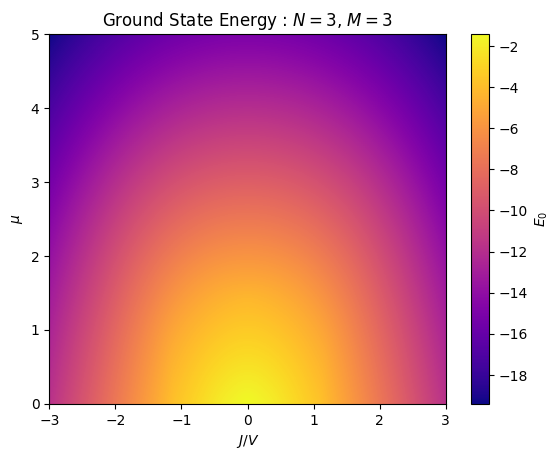

In [87]:
plt.figure()

plt.pcolormesh(J_V_ratio_grid, mu_grid, energy_grid, shading='auto', cmap='plasma')

plt.xlabel("$J/V$")
plt.ylabel("$\mu$")
plt.title(f"Ground State Energy : $N=${N}, $M=${M}")
plt.colorbar(label="$E_0$")

plt.show()

<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Joe\AppData\Local\Temp\ipykernel_8472\3460712212.py:6: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mu$")
C:\Users\Joe\AppData\Local\Temp\ipykernel_8472\3460712212.py:8: SyntaxWarning: invalid escape sequence '\D'
  plt.colorbar(label="$\Delta E = E_1 - E_0$")


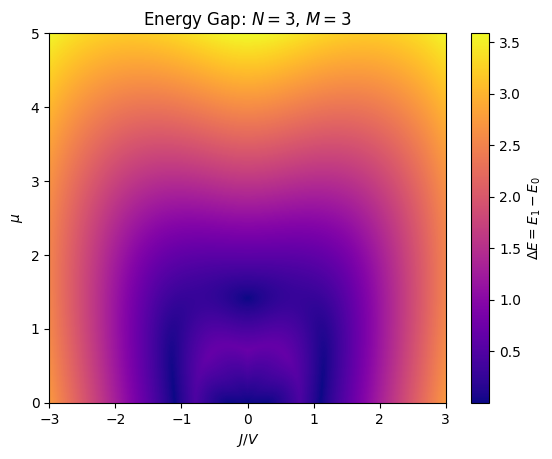

In [88]:
plt.figure()

plt.pcolormesh(J_V_ratio_grid, mu_grid, energy_gap_grid, shading='auto', cmap='plasma')

plt.xlabel("$J/V$")
plt.ylabel("$\mu$")
plt.title(f"Energy Gap: $N=${N}, $M=${M}")
plt.colorbar(label="$\Delta E = E_1 - E_0$")

plt.show()

<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Joe\AppData\Local\Temp\ipykernel_8472\486121884.py:6: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mu$")
C:\Users\Joe\AppData\Local\Temp\ipykernel_8472\486121884.py:7: SyntaxWarning: invalid escape sequence '\D'
  plt.title(f"Gap Mask [$\Delta E <$ {energy_gap_cutoff}, {energy_gap_cutoff_2}, {energy_gap_cutoff_3}]: $N=${N}, $M=${M}")


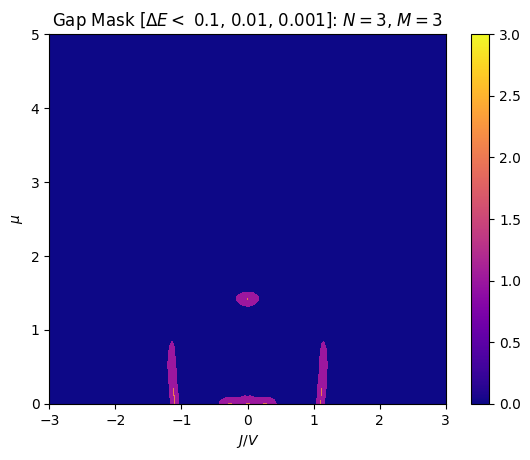

In [89]:
plt.figure()

plt.pcolormesh(J_V_ratio_grid, mu_grid, energy_gap_mask, shading='auto', cmap='plasma')

plt.xlabel("$J/V$")
plt.ylabel("$\mu$")
plt.title(f"Gap Mask [$\Delta E <$ {energy_gap_cutoff}, {energy_gap_cutoff_2}, {energy_gap_cutoff_3}]: $N=${N}, $M=${M}")

plt.colorbar()

plt.show()